In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the pandas library, which is commonly used for data manipulation and analysis
import pandas as pd

# Define the directory path where the training images are stored.
# This is a raw string literal (denoted by the 'R' or 'r' prefix) which tells Python
# to treat backslashes in the string as literal characters and not as escape characters.
train_images_dir = R"C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images"


# Define the file path for a CSV file that contains the training data.
# In machine learning tasks, this CSV file often contains annotations or labels
# for each training instance. Here, it's likely to contain information about steel images
# and their respective defect annotations.
csv_file = R"C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train.csv"

# Load the CSV file into a pandas DataFrame. A DataFrame is a 2-dimensional labeled
# data structure with columns that can be of different types. This is similar to a table
# in a database or a data frame in R. The 'pd.read_csv()' function is used to read the
# contents of the CSV file into the DataFrame 'data', which can then be used for further
# analysis and processing in the machine learning pipeline.
data = pd.read_csv(csv_file)


In [3]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [4]:
#Import this required the 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [5]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [6]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [7]:
data.shape

(7095, 3)

ClassId
3    5150
1     897
4     801
2     247
Name: count, dtype: int64

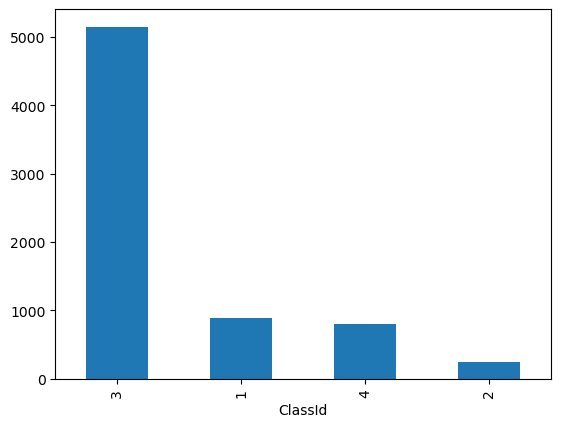

In [8]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

ClassID 3 has the maximum count among other classid's.

**Checking Random Steel images to check whether it is defected or not**

#### Preprocessing Images: The preprocess_image function loads an image from a given path, resizes it to a specified size, and optionally normalizes its pixel values. The outcome is a preprocessed image in the form of a NumPy array, suitable for use in machine learning models.

In [9]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(120, 120), normalize=True):
    """
    Preprocesses an image: loads, resizes, and normalizes it.

    Parameters:
    - image_path (str): Path to the image file.
    - target_size (tuple): Desired size of the output image (width, height).
    - normalize (bool): Whether to normalize pixel values.

    Returns:
    - Preprocessed image as a numpy array.
    """
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is not None:
        # Resize the image
        image = cv2.resize(image, target_size)

        # Normalize the image
        if normalize:
            image = image / 255.0

        return image
    else:
        return None


In [10]:
# The code iterates over a DataFrame data containing image filenames and their corresponding class IDs. 
# For each image, it constructs the file path, preprocesses the image using the preprocess_image function, 
# and checks if the image was found and processed correctly. Processed images and their class IDs are stored in 
# separate lists (l1 for images, l2 for class IDs). After processing all images, it converts these lists into NumPy arrays 
# (X for images, y for class IDs), which are typically used as input and output for machine learning models. 
# If necessary, additional processing like label encoding of y can be performed after this conversion.

from tqdm import tqdm  # tqdm is a library that provides a progress bar for loops.
import os  # os is a standard Python library for interacting with the operating system.

l1 = []  # List to store preprocessed images
l2 = []  # List to store corresponding labels

# Loop through each entry in the DataFrame 'data' with a progress bar provided by tqdm.
for img, ClassId, _ in tqdm(data.values):
    # Construct the full file path for the image by joining the directory path and the image filename.
    image_path = os.path.join(train_images_dir, img)
    
    # Preprocess the image using the earlier defined function which could resize and normalize the image.
    processed_image = preprocess_image(image_path)

    # If the image was found and successfully preprocessed, append it to the list of images (l1).
    # Also, append the corresponding class ID to the list of labels (l2).
    if processed_image is not None:
        l1.append(processed_image)
        l2.append(ClassId)
    else:
        # If the image was not found at the given path, print an error message with the path for debugging.
        print(f"Image not found at path: {image_path}")

# Convert the lists of images and labels into NumPy arrays to facilitate further processing.
# This step is common in data preparation before training a machine learning model.
X = np.array(l1)  # 'X'  denote the input features for a model.
y = np.array(l2)  # 'y' denote the labels or targets for supervised learning.


  0%|▏                                                                               | 14/7095 [00:00<01:53, 62.21it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\000a4bcdd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\000f6bf48.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0030401a5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0046839bd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\008621629.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0088260da.jpg


  1%|▍                                                                               | 36/7095 [00:00<01:17, 91.28it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\00ac8372f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\00ac8372f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\00af2671f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\00bc01bfe.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\00bf8497a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\00c88fed0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\00c88fed0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

  1%|▌                                                                               | 54/7095 [00:00<01:49, 64.18it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\01661826d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\01919944c.jpg


  1%|▉                                                                               | 80/7095 [00:01<02:09, 54.03it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\02431211b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\026183d85.jpg


  1%|█                                                                               | 99/7095 [00:01<02:06, 55.51it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\031627893.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\03461f8e0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\034941f9d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\035021da2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\03860f6a9.jpg


  2%|█▏                                                                             | 112/7095 [00:01<02:03, 56.76it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\039577d49.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\04055fd3e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\04072b39a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\041187764.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\04246167f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0429258ad.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\044700866.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

  2%|█▍                                                                             | 124/7095 [00:02<01:41, 68.64it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\046282f58.jpg


  2%|█▌                                                                             | 144/7095 [00:02<02:03, 56.34it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\05184e71b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\052838084.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\05396b495.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\054190eb2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\05747b10b.jpg


  2%|█▊                                                                             | 158/7095 [00:02<01:54, 60.44it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\059000a4f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\059327fe3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0606395c5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\060964105.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\062167783.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\063571c5c.jpg


  2%|█▉                                                                             | 173/7095 [00:02<01:51, 61.93it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\06713b712.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\068587112.jpg


  3%|██▏                                                                            | 199/7095 [00:03<02:06, 54.72it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\07732248e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\07732248e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\079054aa2.jpg


  3%|██▍                                                                            | 224/7095 [00:03<02:15, 50.55it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\08193cfc8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0841074c1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0858830b6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\08605c0eb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\08808b1a2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\08852b69d.jpg


  4%|██▊                                                                            | 258/7095 [00:04<02:07, 53.46it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\09140dda7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\092145f0c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\092614afe.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\09323504a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\09552b326.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\096465b41.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0970201e2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

  4%|███                                                                            | 278/7095 [00:04<02:08, 53.18it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0986996f0.jpg


  4%|███▌                                                                           | 316/7095 [00:05<01:08, 98.85it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0a21ce787.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0a26aceb2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0a37f0a29.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0a405b396.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0a4ad45a5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0a5cff3a7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0a8306bfe.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

  5%|███▋                                                                          | 333/7095 [00:05<00:58, 116.48it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0bb37f2aa.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0bb39cafa.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0bbd121d7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0bc0d715e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0bc373e44.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0bc373e44.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0bc3f8ce8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

  5%|███▊                                                                           | 346/7095 [00:05<01:07, 99.72it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\0c9ae816d.jpg


  6%|█████                                                                          | 452/7095 [00:07<02:08, 51.71it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\101648543.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\101648543.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\10378f8ea.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\1086196e1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\10909b4bb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\10972add9.jpg


  7%|█████▎                                                                         | 480/7095 [00:08<01:48, 61.11it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\11192bc94.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\112942aed.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\112942aed.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\11418b1c5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\1165781f0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\117759a83.jpg


  7%|█████▌                                                                         | 504/7095 [00:08<01:42, 64.28it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\12234aab8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\12274ea9c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\12375dd7a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\1238340e9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\124204a30.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\12471d0d5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\12627251e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

  7%|█████▊                                                                         | 518/7095 [00:08<01:49, 59.86it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\13067c801.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\13169e4cf.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\132511b8b.jpg


  7%|█████▉                                                                         | 531/7095 [00:09<02:01, 53.85it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\1387583da.jpg


  8%|██████                                                                         | 550/7095 [00:09<02:05, 52.26it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\14457e888.jpg


  8%|██████▎                                                                        | 569/7095 [00:09<02:03, 52.67it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\15547c309.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\15796b4d5.jpg


  8%|██████▌                                                                        | 594/7095 [00:10<02:03, 52.74it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\163473240.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\16371ae14.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\16498a156.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\166645a0b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\166818755.jpg


  9%|██████▊                                                                        | 608/7095 [00:10<01:56, 55.64it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\1699951da.jpg


  9%|██████▉                                                                        | 627/7095 [00:10<01:57, 55.09it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\17383bd97.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\178490b45.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\1795867f2.jpg


  9%|███████▎                                                                       | 652/7095 [00:11<01:57, 54.98it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\180478e66.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\181454b94.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\183383e8d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\18615eacf.jpg


  9%|███████▍                                                                       | 667/7095 [00:11<01:48, 59.35it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\186534efc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\189659389.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\1897882a1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\190190a6f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\19115aedb.jpg


 10%|███████▌                                                                       | 681/7095 [00:11<01:49, 58.61it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\192531334.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\193884988.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\19656c148.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\198252b95.jpg


 10%|███████▋                                                                       | 687/7095 [00:11<01:51, 57.43it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\19955420c.jpg


 13%|█████████▉                                                                     | 898/7095 [00:16<01:37, 63.26it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\200992bc9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\201560907.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2019417e0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\202838a14.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\204949166.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\205360569.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\205685883.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 13%|██████████▏                                                                    | 913/7095 [00:16<01:39, 62.35it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\208825e67.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\20905c068.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\20964a4f0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\20964a4f0.jpg


 13%|██████████▏                                                                    | 920/7095 [00:16<01:39, 62.10it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\21365e1a3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\214465021.jpg


 13%|██████████▍                                                                    | 933/7095 [00:16<02:11, 46.89it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\219621d5d.jpg


 13%|██████████▌                                                                    | 951/7095 [00:17<01:59, 51.57it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\22031aa8f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\22123f29f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\22458f946.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\22553cebc.jpg


 14%|██████████▋                                                                    | 964/7095 [00:17<01:52, 54.71it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\22827c51d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\229500455.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\229906ed1.jpg


 14%|██████████▉                                                                    | 977/7095 [00:17<01:49, 55.77it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\23115ad3a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\23120f506.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\232256b21.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\23783382d.jpg


 14%|███████████                                                                   | 1006/7095 [00:18<01:31, 66.21it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\24066d57e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\24154161c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\24256f234.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\242894fc4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\24528b550.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\247108a1c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\248220d45.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 15%|███████████▍                                                                  | 1035/7095 [00:18<01:44, 58.19it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\250107a1b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2527831fa.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\25337cb38.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\25515c2f6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\25548e840.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\25737d300.jpg


 15%|███████████▋                                                                  | 1064/7095 [00:19<01:41, 59.20it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\26272c2a7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\268446e17.jpg


 15%|███████████▉                                                                  | 1091/7095 [00:19<01:18, 76.76it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\271551c4f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2720732e7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\27207fb2e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2725ee8d6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2731f7830.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2731f7830.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2741274d7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 15%|████████████                                                                  | 1099/7095 [00:19<01:27, 68.31it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2789df930.jpg


 16%|████████████▎                                                                 | 1115/7095 [00:19<01:28, 67.31it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\28241874f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\282425786.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\284639f13.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\285781401.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\28661fd17.jpg


 16%|████████████▋                                                                 | 1151/7095 [00:20<01:14, 79.28it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\29124169b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2912df978.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2912e9e24.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2929284cc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2930b4f52.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2930b4f52.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\2932c0dd3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 19%|██████████████▌                                                               | 1326/7095 [00:23<01:36, 60.09it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\30070d59d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3012f44e9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\301601620.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\30171214c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3035a46b7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\304083ca3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3041d63ba.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 19%|██████████████▊                                                               | 1342/7095 [00:23<01:30, 63.28it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\309488202.jpg


 19%|██████████████▉                                                               | 1360/7095 [00:24<01:21, 70.24it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3116edfe6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\312224509.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3124b1e5c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\31262e8f9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\31433d3b4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\315405789.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3155bc129.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 19%|███████████████▏                                                              | 1383/7095 [00:24<01:29, 64.04it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\320557243.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\321975fb3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3221a0d79.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\32578d3e5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3266ff34d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3294c9bd1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3294c9bd1.jpg


 20%|███████████████▍                                                              | 1408/7095 [00:24<01:18, 72.25it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\33226811d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3325e2266.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3328c4bf9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\33368929c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\333832839.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\33514c0b1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\33705a505.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 20%|███████████████▋                                                              | 1432/7095 [00:25<01:19, 70.80it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3405695b6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3412f557e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\34349ea9e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\34561de46.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3463eedaf.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3467968c0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\34913b58d.jpg


 21%|████████████████                                                              | 1459/7095 [00:25<01:15, 74.74it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3505dd9f3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\351569b6a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\351936382.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\352063998.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3520eaa6d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\35248a277.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\35271f898.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 21%|████████████████▏                                                             | 1474/7095 [00:25<01:26, 65.26it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\36025df84.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3604dfc38.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3672e84bc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\367553727.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\36789516a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3684a95a8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3688df8e4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 21%|████████████████▍                                                             | 1499/7095 [00:26<01:23, 66.78it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\37009c774.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3704cdfd6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3711a5456.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3711ecc93.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\37333b84a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3738d1881.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3740a6dd1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 22%|████████████████▉                                                             | 1535/7095 [00:26<01:30, 61.36it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3846a8c0c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3856224a4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3860f3d39.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\38698fd76.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\38760254d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3888ec2cd.jpg


 22%|█████████████████▏                                                            | 1558/7095 [00:27<01:25, 64.91it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3932751f1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3933a5fcc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\395381ac8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3964357cd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\397221566.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3974a2a75.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\3979d10ac.jpg


 22%|█████████████████▎                                                            | 1572/7095 [00:27<01:35, 57.66it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\39960c9e9.jpg


 24%|███████████████████                                                           | 1736/7095 [00:30<01:30, 59.24it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\400144782.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\400161088.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4014c79d3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4014d6f31.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\401614c72.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4029fea8e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\404259a55.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 25%|███████████████████▍                                                          | 1772/7095 [00:31<01:15, 70.83it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\410194f0a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\410194f0a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\41028db98.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\411377ca3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\41333f13c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\41411378e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\41411378e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 25%|███████████████████▌                                                          | 1780/7095 [00:31<01:17, 68.30it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\41716714b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\41977e060.jpg


 25%|███████████████████▊                                                          | 1798/7095 [00:31<01:13, 72.36it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\42087f902.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4216b133c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\42353cc21.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4243c7476.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\42527400c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\42527400c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\426581acf.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 26%|████████████████████                                                          | 1827/7095 [00:32<01:10, 74.72it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\431234941.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4340e1e42.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4345c2b85.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4345db2fc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4353697d9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4355ef39b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\436398e3b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 26%|████████████████████▎                                                         | 1851/7095 [00:32<01:21, 64.33it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\44011d351.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\441866b3d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4422bc417.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4422bc417.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\44415ab00.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4448b4286.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\44668f045.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 26%|████████████████████▌                                                         | 1865/7095 [00:32<01:25, 61.50it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4499aaa80.jpg


 27%|████████████████████▋                                                         | 1883/7095 [00:33<01:16, 68.56it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\45212b455.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4529ee151.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\455241741.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\45612bd46.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\45740ac20.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\459617182.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\459790d82.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 27%|█████████████████████                                                         | 1912/7095 [00:33<01:23, 62.30it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4613bc12c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4613d520c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\46160f1f5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\463108c67.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\464917fe0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\464987349.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\465808594.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 27%|█████████████████████▎                                                        | 1939/7095 [00:33<01:10, 73.55it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\47111332b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\472407235.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4733edde8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\474104794.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\47454aedd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\47568c5de.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4783eb121.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 28%|█████████████████████▋                                                        | 1971/7095 [00:34<01:16, 67.21it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4803fc0ae.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\484439824.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\48532e006.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4854add54.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4857d0687.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\48626da29.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4874f19dd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 28%|█████████████████████▊                                                        | 1987/7095 [00:34<01:14, 68.25it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4932f1a80.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4941491de.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\49416ce82.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\496790c19.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\4992fae6f.jpg


 31%|███████████████████████▉                                                      | 2176/7095 [00:38<01:22, 59.98it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5013e5c9d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5020df2f8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5041c4a3f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5064ecb6d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\50655a748.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\506826fc6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\50742b144.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 31%|████████████████████████▏                                                     | 2200/7095 [00:38<01:09, 69.96it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\51097aa45.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\511570622.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5125317c7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5132041da.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\514222386.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\51434f59b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\51498e7a6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 31%|████████████████████████▍                                                     | 2222/7095 [00:39<01:16, 63.83it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5210ac609.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\52122168a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5227eaed2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5238bc100.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\52497822f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5256faa06.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\527517cf3.jpg


 32%|████████████████████████▌                                                     | 2237/7095 [00:39<01:19, 61.00it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\528112571.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5283b3138.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5303447ca.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5335b8fd7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\533926801.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\534666b46.jpg


 32%|████████████████████████▊                                                     | 2254/7095 [00:39<01:08, 70.61it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\534991d20.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5350e17c2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\535970659.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5370c78e0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5377dbac1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\53994e13b.jpg


 32%|████████████████████████▉                                                     | 2271/7095 [00:39<01:12, 66.35it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\542084ea9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5432ff65a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\54439ae68.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5457e4e20.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5462db9cd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5462fa711.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\54738099a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 32%|█████████████████████████▎                                                    | 2302/7095 [00:40<01:15, 63.64it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\55042415c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\55136d7f3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\55303df62.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5545e4b0f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5545e4b0f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\554710095.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5562229c3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 33%|█████████████████████████▌                                                    | 2326/7095 [00:40<01:06, 71.86it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5600ec21b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\56011ad29.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\56120829d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5613bb745.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\562055ee9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\56553f422.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5660432cc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 33%|█████████████████████████▉                                                    | 2354/7095 [00:41<01:06, 71.14it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\57239737a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5727d7f96.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\57314986d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5757100f0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\576910e29.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\576910e29.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\57794735f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 34%|██████████████████████████▏                                                   | 2380/7095 [00:41<01:06, 70.56it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\58049fca1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5810e2d40.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\58384cf41.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5848791de.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5848791de.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5852e61b5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\585904c94.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 34%|██████████████████████████▍                                                   | 2404/7095 [00:41<01:10, 66.41it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\59384b153.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\594303084.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5952d06e5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\595373657.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\5956f0975.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\59849c3de.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\599251689.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 37%|████████████████████████████▍                                                 | 2592/7095 [00:45<01:24, 52.98it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\602288d9c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6023f98ef.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6057916d4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\607105dac.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6078cc0b1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6081f6677.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6085fc4cc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 37%|████████████████████████████▊                                                 | 2626/7095 [00:46<01:06, 66.96it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6100fae0f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\61204ded5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\61228a49c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6143631ab.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\61457b567.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6149dc4ee.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6149dc4ee.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 37%|█████████████████████████████▏                                                | 2651/7095 [00:46<01:03, 69.96it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\620100d93.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\620568126.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6209acbc4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\62122709f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6212e44a0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6218cd94a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\622086df1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 38%|█████████████████████████████▎                                                | 2668/7095 [00:47<01:05, 67.53it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\62849bbef.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\629277c2f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\629900275.jpg


 38%|█████████████████████████████▌                                                | 2689/7095 [00:47<00:55, 79.41it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6308e03ad.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\631774933.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6320ec8c6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\632133372.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6336c7ef4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\633701ae3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6343860bc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 38%|█████████████████████████████▊                                                | 2715/7095 [00:47<01:03, 69.50it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6406c1e6f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\64261b3f7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6430ea237.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6430ea237.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\64361cd8b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\64443519b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\64443519b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 38%|██████████████████████████████                                                | 2731/7095 [00:47<01:03, 69.25it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\64934ac51.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\649822bd7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\649890305.jpg


 39%|██████████████████████████████▏                                               | 2749/7095 [00:48<01:03, 68.56it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\653655d53.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\65657b8ed.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\65688fbc2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\65841b207.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6588cf973.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\65903909a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\659985985.jpg


 39%|██████████████████████████████▍                                               | 2773/7095 [00:48<01:06, 65.13it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6603e9f89.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\66574a641.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6666f7f16.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6668e50d0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\66849c8bd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6686b6b23.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\66987e071.jpg


 39%|██████████████████████████████▋                                               | 2787/7095 [00:48<01:09, 62.32it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6705eb964.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6714ba056.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6745075b9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6753759e0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\67558ad53.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\67579f49a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\67741aee6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 39%|██████████████████████████████▊                                               | 2801/7095 [00:49<01:08, 62.30it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6791c36e9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\67995d23c.jpg


 40%|███████████████████████████████▏                                              | 2832/7095 [00:49<00:59, 71.97it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6812ce51c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\68142cad1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\68150e7ff.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\682271cbc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6825de090.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6826c7bde.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6846b82fa.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 40%|███████████████████████████████▎                                              | 2850/7095 [00:49<01:02, 67.94it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\69071acbc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6909e168c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6915f678b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\691680efc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6916a083e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\69205724f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\69231176e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 40%|███████████████████████████████▌                                              | 2867/7095 [00:50<01:00, 70.05it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\697427d70.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6976314b8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\6985a34e0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\698995345.jpg


 43%|█████████████████████████████████▊                                            | 3077/7095 [00:54<00:54, 74.40it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\700209a95.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7025a90c1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\70279ce5b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\703421ef2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7039151ef.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7045c2a55.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7046618f6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 44%|█████████████████████████████████▉                                            | 3092/7095 [00:54<01:06, 60.56it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\711069458.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\714256911.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\714256911.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7149874c8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7150719e7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\71553a0d8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\71553a0d8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 44%|██████████████████████████████████▏                                           | 3113/7095 [00:54<00:59, 66.57it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7168496a4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\719519f07.jpg


 44%|██████████████████████████████████▍                                           | 3128/7095 [00:55<01:01, 64.15it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7202e52d8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7210ffc2d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7220aba6c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7232c2ceb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7242fe32c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7242fe32c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7249ae1f4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 44%|██████████████████████████████████▋                                           | 3154/7095 [00:55<01:02, 63.39it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\73059a959.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\73122f910.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7329b8668.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\73303e8a0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\73472d296.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7365300fe.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7378f1d94.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 45%|███████████████████████████████████                                           | 3189/7095 [00:56<00:54, 71.34it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7404322b0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\74048991c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7410d4361.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\741265573.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\74131d9ff.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7420f27c9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7424ab9af.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 45%|███████████████████████████████████▎                                          | 3208/7095 [00:56<00:58, 66.74it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\749407e33.jpg


 45%|███████████████████████████████████▍                                          | 3226/7095 [00:56<00:52, 74.24it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\75070e973.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\75361926d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7549c90b1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\756390c3a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\757577d91.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\75778a6a1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\75785b3eb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 46%|███████████████████████████████████▊                                          | 3253/7095 [00:56<00:48, 78.99it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7604be5f3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\76094e200.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\76096b17b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7612f0d6c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\76165cccc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7620c36fb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7626234a2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 46%|███████████████████████████████████▊                                          | 3262/7095 [00:57<00:49, 77.27it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7690902ee.jpg


 46%|████████████████████████████████████                                          | 3280/7095 [00:57<00:52, 72.12it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\77064b126.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\77343ffda.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\773948ca6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7740cc61d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\774400958.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7749df027.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7773445b7.jpg


 47%|████████████████████████████████████▎                                         | 3304/7095 [00:57<00:56, 67.04it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\78045cb2f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7806aa75f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\781542bfc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7827a1157.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\78416c3d0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7843767e9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\78556368f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 47%|████████████████████████████████████▋                                         | 3334/7095 [00:58<00:49, 76.61it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\792266a85.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\79307aa18.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\794307d65.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\79550304c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\795907727.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\79679dd6a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\7970f0008.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 50%|██████████████████████████████████████▋                                       | 3514/7095 [01:01<01:02, 57.31it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8016e642c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\801887861.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8066b7589.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8066b7589.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8071db7b3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\80841e418.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\80842d229.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 50%|██████████████████████████████████████▉                                       | 3543/7095 [01:02<00:55, 63.48it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\81137ae8b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\81770ddda.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8177945a9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\81847fd11.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\81891e821.jpg


 50%|███████████████████████████████████████▏                                      | 3567/7095 [01:02<00:53, 66.23it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\82168bba3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\823994b16.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8248c9b1d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8248c9b1d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\82532a288.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\82602cb06.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8266cca81.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 51%|███████████████████████████████████████▌                                      | 3601/7095 [01:03<00:49, 70.45it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8313b4e90.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\83298d267.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\833433e81.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8344ef24d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8345249a8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\83476e834.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8355a5249.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 51%|███████████████████████████████████████▉                                      | 3633/7095 [01:03<00:51, 66.62it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8417eb22d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\84232105a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8445de2d9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\845935465.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\846788254.jpg


 51%|████████████████████████████████████████                                      | 3641/7095 [01:03<00:49, 69.83it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8478415cf.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8484468e0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\84865746c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\84865746c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\848713301.jpg


 52%|████████████████████████████████████████▎                                     | 3667/7095 [01:04<00:47, 71.49it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\850058ea8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\85107deb3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8516fcc92.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8527d0b55.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8527d0b55.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\85294cff9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\85294cff9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 52%|████████████████████████████████████████▌                                     | 3684/7095 [01:04<00:47, 72.39it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8600decb6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\86063fcba.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8611deb61.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\86217c4ba.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\86226216f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\863868ed4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8645f73f1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 52%|████████████████████████████████████████▋                                     | 3705/7095 [01:04<00:46, 72.75it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\86752d23a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\86756300d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\867572f1e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8677c19e6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\868759698.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\869055892.jpg


 52%|████████████████████████████████████████▉                                     | 3721/7095 [01:05<00:51, 65.05it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8709ea899.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\87106dfdb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8726206f5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\875612422.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\87754d760.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\87754d760.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\878824b35.jpg


 53%|█████████████████████████████████████████▏                                    | 3745/7095 [01:05<00:50, 66.28it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8821b2e2c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8827d2bd3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\88365b4b0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8847458a0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\88646d398.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8866a93f6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\8872fe6db.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 53%|█████████████████████████████████████████▍                                    | 3766/7095 [01:05<00:43, 76.90it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\89087f994.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\89158744a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\89158744a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\891837278.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\892321605.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\892582cf9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\89332ba01.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 56%|███████████████████████████████████████████▊                                  | 3983/7095 [01:10<00:44, 69.64it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9019c0e1e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\90246e919.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9027291e8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9028ff68e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\904584541.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\904677cea.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\904677cea.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 56%|███████████████████████████████████████████▉                                  | 3998/7095 [01:10<00:44, 68.98it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\910127691.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\910540b7d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9121da7fe.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\91222b4c9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9147356db.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\91478a2fb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9150a0950.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 57%|████████████████████████████████████████████▎                                 | 4033/7095 [01:10<00:35, 86.61it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9202ebeb6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\92057aa8a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\922939d64.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9236b3124.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9236f984c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9252073f0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9253b216e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 57%|████████████████████████████████████████████▌                                 | 4051/7095 [01:11<00:39, 76.70it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\930391b64.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9307b3de8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\93126606c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9323bd21d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\933533867.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\933675d91.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9341d848d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 58%|████████████████████████████████████████████▊                                 | 4081/7095 [01:11<00:39, 76.91it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\94050efd8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9406cb49a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9412c0cf6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9424f9664.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9426ce32a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\94305429d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9438d5eef.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 58%|█████████████████████████████████████████████▎                                | 4118/7095 [01:11<00:39, 75.28it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9515afade.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9531c4b99.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9546b5abe.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9553974f4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9557969ee.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9570a27f4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9574104d6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 58%|█████████████████████████████████████████████▍                                | 4134/7095 [01:12<00:40, 73.84it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9612cf3ee.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9612e2ee3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\961333d4e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9622959c1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\96279bbc2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\96299c17c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9661e7677.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 59%|█████████████████████████████████████████████▋                                | 4154/7095 [01:12<00:35, 83.01it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\97047587f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\97192a78b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9725a81d1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9737361a7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\97419c683.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9741c9475.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\974750ad1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 59%|█████████████████████████████████████████████▊                                | 4163/7095 [01:12<00:38, 76.06it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9772f9a2c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\97892278c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9789423c2.jpg


 59%|██████████████████████████████████████████████                                | 4188/7095 [01:12<00:41, 69.84it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\98017b765.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9804396ef.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9805e5d5d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\982193e49.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\982193e49.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9822aabfc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9844183a4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 59%|██████████████████████████████████████████████▎                               | 4213/7095 [01:13<00:48, 59.61it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\990195c76.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\990431713.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9906c980e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\99224c3d5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9941cb9f1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9958480e2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\9962acd22.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 62%|████████████████████████████████████████████████▎                             | 4392/7095 [01:16<00:44, 60.77it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a0058b3fe.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a01bc9da8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a01c8ce20.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a025c6ed2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a02fe46b6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a045e21e6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a053e52ca.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 62%|████████████████████████████████████████████████▌                             | 4418/7095 [01:17<00:29, 91.42it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a09a889b2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a09e5bfb0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a0a34a07c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a0a58dd59.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a0ae0cbcf.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a0ae0cbcf.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a0c4d93c1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 63%|████████████████████████████████████████████████▊                             | 4437/7095 [01:17<00:33, 79.86it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a13c52c08.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a14e96726.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a14eeb75d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a17a84d8f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a18bdb241.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a1b3fa11b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a1bede9b1.jpg


 63%|████████████████████████████████████████████████▉                             | 4449/7095 [01:17<00:31, 84.48it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a1c385029.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a1d0b7617.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a1d5d669f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a1dba4777.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a1f41023e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a1f5481df.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a21bfa25a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 63%|█████████████████████████████████████████████████▏                            | 4472/7095 [01:17<00:29, 88.33it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a27bd6af7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a28a7b7be.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a28a7b7be.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a29c6239f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a29c6239f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a2b2c9e3e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a2bdcd021.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 63%|█████████████████████████████████████████████████▎                            | 4490/7095 [01:18<00:30, 86.35it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a33b2c662.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a33b2c662.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a33d86440.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a33ec265a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a35e7e370.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a39b0ef7e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a3a66a86a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 64%|█████████████████████████████████████████████████▌                            | 4511/7095 [01:18<00:34, 74.96it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a44dd8116.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a49cff42b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a49edb718.jpg


 64%|█████████████████████████████████████████████████▋                            | 4523/7095 [01:18<00:30, 83.56it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a4a648cf6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a4c93ac65.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a4cef60d1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a4d22b821.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a4d3149e0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a4d9a97f6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a4d9a97f6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 64%|█████████████████████████████████████████████████▉                            | 4541/7095 [01:18<00:33, 76.39it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a52f36666.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a56c8f958.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a56c8f958.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a56d4b7be.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a56df9123.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a5a0e4b19.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a5aa4829b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 64%|██████████████████████████████████████████████████                            | 4558/7095 [01:18<00:26, 97.44it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a5b7b7fcc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a5c3d1132.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a5c7ae660.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a5cb0256f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a5d571de0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a5d8010d4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a5e7b9502.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 65%|██████████████████████████████████████████████████▍                           | 4592/7095 [01:19<00:29, 83.67it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a6a6f59c7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a6aceec2e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a6aceec2e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a6af7373c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a6b00abd7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a6b3d554a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a6b56df05.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 65%|██████████████████████████████████████████████████▊                           | 4618/7095 [01:19<00:37, 65.56it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a7c57d74f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a7d470272.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a7d5ae972.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a7e675896.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a7e79695b.jpg


 65%|███████████████████████████████████████████████████                           | 4644/7095 [01:20<00:36, 67.90it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a8b77ce4d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a8ba23b0a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a8ba23b0a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a8bc0275d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a8cd71412.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a8de477f0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a8eaf15a1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

 66%|███████████████████████████████████████████████████▍                          | 4679/7095 [01:20<00:32, 74.99it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a9a045b71.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a9a5ac063.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a9b1abf48.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a9b327adb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a9b4c5d52.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a9c5e9f1e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\train_images\a9cb86e69.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assign

100%|██████████████████████████████████████████████████████████████████████████████| 7095/7095 [02:11<00:00, 53.83it/s]


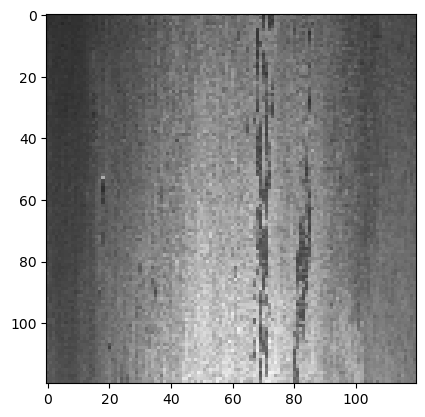

In [11]:
# Displaying random pictures
i = 15
plt.imshow(l1[i])

In [12]:
X.shape

(5915, 120, 120, 3)

In [13]:
y = to_categorical(y)

In [14]:
y

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

### Splitting the data into 80% train set and 20% test set

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)

In [16]:

print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (4732, 120, 120, 3)
x_test shape: (1183, 120, 120, 3)
y_train shape: (4732, 5)
y_test shape: (1183, 5)


#### Building the CNN Model: This code sets up a CNN with several convolutional and max pooling layers, followed by a flattening layer and several fully connected (dense) layers. The final dense layer uses a softmax activation function to output class probabilities for a 5-class classification problem. Dropout layers are included to help reduce overfitting.

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Instantiate a Sequential model
model = Sequential()

# Add the first convolutional layer with 32 filters, a kernel size of 3x3,
# specifying the expected input data shape, and using ReLU activation function
model.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3), activation="relu"))

# Add a max pooling layer to reduce the spatial dimensions of the output from conv layer
model.add(MaxPooling2D(pool_size=(3, 3)))

# Add a second convolutional layer with 64 filters and ReLU activation
model.add(Conv2D(64, (3, 3), activation="relu"))

# Add another max pooling layer to reduce spatial dimensions further
model.add(MaxPooling2D(pool_size=(3, 3)))

# Add a third convolutional layer with 64 filters and ReLU activation
model.add(Conv2D(64, (3, 3), activation="relu"))

# Add a max pooling layer with a pool size of 4x4
model.add(MaxPooling2D(pool_size=(4, 4)))

# Flatten the 3D output to 1D to connect it to the dense layers
model.add(Flatten())

# Add a dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation="relu"))

# Add a dropout layer to prevent overfitting by dropping out 20% of the neurons
model.add(Dropout(0.2))

# Add another dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation="relu"))

# Add another dropout layer to prevent overfitting by dropping out 20% of the neurons
model.add(Dropout(0.2))

# Add a dense layer with 256 neurons and ReLU activation
model.add(Dense(256, activation="relu"))

# Add the output layer with 5 neurons (for 5 classes) using softmax activation function
# to output probabilities of the classes
model.add(Dense(5, activation="softmax"))


Compiling the model

In [18]:
from keras import losses, optimizers

# Compile the model
model.compile(
    # Use categorical crossentropy as the loss function, which is common for multi-class classification problems.
    # This function compares the distribution of the predictions with the true distribution of the labels.
    loss=losses.categorical_crossentropy,

    # Use the Adam optimizer, a popular gradient descent optimization algorithm,
    # for adjusting the weights of the network during training.
    optimizer=optimizers.Adam(),

    # Use 'accuracy' as the metric for evaluating the performance of the model.
    # This metric will calculate how often predictions match one-hot encoded labels.
    metrics=["accuracy"]
)


In [19]:
# Convert the data type of X_train and X_test from their current type to 'float32'.
# This conversion is typically done for neural network training as it helps with
# reducing memory consumption and can speed up calculations due to optimized float operations.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [20]:
from keras.preprocessing.image import ImageDataGenerator

# Initialize an ImageDataGenerator object. This is used to augment image data in real time during training.
# Since no parameters are specified, this ImageDataGenerator will not apply any augmentation, it will only
# be used for feeding the data to the model.
train_datagen = ImageDataGenerator()

# Create a data generator for the training set. This generator will produce batches of augmented data.
# 'flow' method takes numpy data & label arrays, and generates batches of augmented data.
# Here, batch size is set to 128, meaning each batch fed to the model during training will contain 128 images.
train_generator = train_datagen.flow(X_train, y_train, batch_size=128)

# Fit the model on the data provided by train_generator.
# The model trains for 30 epochs, meaning it will go through the entire dataset 30 times.
# validation_data is provided as a tuple (X_test, y_test) to evaluate the model's performance
# on the test set after each epoch of training. The 'verbose=1' argument enables detailed logging output for each epoch.
history = model.fit(train_generator, epochs=30, validation_data=(X_test, y_test), verbose=1)


Epoch 1/30


37/37 [==============================] - 23s 516ms/step - loss: 1.0004 - accuracy: 0.7088 - val_loss: 0.8461 - val_accuracy: 0.7244
Epoch 2/30
37/37 [==============================] - 19s 500ms/step - loss: 0.8100 - accuracy: 0.7253 - val_loss: 0.7697 - val_accuracy: 0.7489
Epoch 3/30
37/37 [==============================] - 19s 519ms/step - loss: 0.7615 - accuracy: 0.7411 - val_loss: 0.7486 - val_accuracy: 0.7515
Epoch 4/30
37/37 [==============================] - 19s 512ms/step - loss: 0.7381 - accuracy: 0.7428 - val_loss: 0.7068 - val_accuracy: 0.7549
Epoch 5/30
37/37 [==============================] - 20s 542ms/step - loss: 0.7238 - accuracy: 0.7405 - val_loss: 0.7125 - val_accuracy: 0.7557
Epoch 6/30
37/37 [==============================] - 19s 501ms/step - loss: 0.7162 - accuracy: 0.7460 - val_loss: 0.7025 - val_accuracy: 0.7574
Epoch 7/30
37/37 [==============================] - 19s 512ms/step - loss: 0.7028 - accuracy: 0.7502 - val_loss: 0.6748 - val_accuracy: 0.75

Fitting the model

In [ ]:
# Train the model using the fit method.
history = model.fit(
    # X_train and y_train are the training data and labels, respectively.
    X_train, y_train,

    # Number of epochs to train the model. An epoch is an iteration over the entire training data.
    epochs=30,

    # The validation_data parameter allows the model to evaluate its performance on a validation dataset
    # at the end of each epoch. X_test and y_test are the testing data and labels.
    validation_data=(X_test, y_test),

    # batch_size indicates the number of samples per gradient update. Here it is set to 128.
    # Smaller batch sizes usually lead to better generalization.
    batch_size=128,

    # verbose=1 indicates that the training progress will be printed with a detailed message for each epoch.
    verbose=1
)


Epoch 1/30
37/37 [==============================] - 25s 654ms/step - loss: 0.4094 - accuracy: 0.8087 - val_loss: 0.5065 - val_accuracy: 0.7828
Epoch 2/30
37/37 [==============================] - 21s 576ms/step - loss: 0.4232 - accuracy: 0.8058 - val_loss: 0.5474 - val_accuracy: 0.7532
Epoch 3/30
37/37 [==============================] - 19s 505ms/step - loss: 0.4149 - accuracy: 0.8020 - val_loss: 0.5088 - val_accuracy: 0.7946
Epoch 4/30
37/37 [==============================] - 20s 532ms/step - loss: 0.3951 - accuracy: 0.8189 - val_loss: 0.5205 - val_accuracy: 0.7802
Epoch 5/30
37/37 [==============================] - 20s 537ms/step - loss: 0.3798 - accuracy: 0.8221 - val_loss: 0.5024 - val_accuracy: 0.7735
Epoch 6/30
37/37 [==============================] - 19s 524ms/step - loss: 0.3766 - accuracy: 0.8221 - val_loss: 0.5883 - val_accuracy: 0.7785
Epoch 7/30
37/37 [==============================] - 20s 535ms/step - loss: 0.3742 - accuracy: 0.8223 - val_loss: 0.5106 - val_accuracy: 0.7887

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the history object's data into a pandas DataFrame.
# 'history.history' contains metrics recorded at the end of each epoch during training.
history_df = pd.DataFrame(history.history)

# Plot the loss and validation loss over epochs.
# 'loss' is the training loss, and 'val_loss' is the loss on the validation set.
# The DataFrame method '.plot' is used for plotting these metrics.
# 'title' specifies the title of the plot.
history_df.loc[:, ['loss', 'val_loss']].plot(title='Loss Curve')

# Show the plot. This line is necessary to display the plot when running in some environments.
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the training history data into a Pandas DataFrame for easy plotting and analysis.
# 'history.history' contains the values of metrics (like accuracy) recorded at the end of each epoch during training.
history_df = pd.DataFrame(history.history)

# Use the DataFrame's .loc method to select and plot the 'accuracy' and 'val_accuracy' columns.
# 'accuracy' is the accuracy on the training set, and 'val_accuracy' is the accuracy on the validation set.
# This plot helps in visualizing how the model's accuracy improves over epochs during training.
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='Accuracy Curve')

# Show the plot. This is necessary for the plot to be displayed when running in certain environments or IDEs.
plt.show()


In [ ]:
# Evaluate the trained model on the test dataset.
# The 'evaluate' function returns the loss value and metrics (here, accuracy) for the model in test mode.
result = model.evaluate(X_test, y_test)

# Extract the loss value from the result.
loss = result[0]

# Extract the accuracy from the result and convert it to percentage.
accuracy = result[1] * 100  # Multiplying by 100 to convert from fraction to percentage.

# Print the accuracy in a formatted string.
# The ':.2f' in the format string specifies that the accuracy should be rounded to 2 decimal places.
print(f"[+] Accuracy: {accuracy:.2f}%")


In [ ]:
#This code snippet is used to load a pre-trained Keras model from an HDF5 file ('my_model.h5').
#This is useful when you want to continue training, evaluate, or use a previously trained model without needing 
#to re-train it from scratch. The model loaded using load_model includes not only the model's architecture but also
#its trained weights and the state of the optimizer, 
#allowing for a seamless continuation of training or immediate use for predictions.
from keras.models import Model
model.save('my_model.h5')

In [ ]:
from keras.models import Model

# Save the current state of the model to a file.
# This includes the model's architecture, weights, and training configuration (like the optimizer, loss, and metrics).
# The model is saved in the HDF5 file format, which is a versatile storage format that supports large, complex data.
# 'my_model.h5' is the file path where the model will be saved.
model.save('my_model.h5')


In [ ]:
# Unfreeze some top layers of the base model
loaded_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all layers before `fine_tune_at`
for layer in loaded_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-5), metrics=['accuracy'])

# Fine-tune the model
fine_tune_epochs = 10
total_epochs = 30 + fine_tune_epochs

history = loaded_model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

In [ ]:
result = loaded_model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

In [ ]:
# loading the test data 
test_images_dir = R"C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\test_images" # Verify this path
print("Test images directory:", test_images_dir)

In [ ]:
import os

# Define the directory path where the test images are stored.
# The 'R' before the string indicates a raw string, which treats backslashes as literal characters.
# It's useful in Windows paths to avoid conflicts with escape characters.
test_images_dir = R"C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\SteelDetection\test_images" # Verify this path

# Use os.listdir to get a list of filenames in the test_images_dir directory.
test_image_files = os.listdir(test_images_dir)

# Check if the list of filenames is empty, which would indicate no files are in the directory.
if not test_image_files:
    # Print a message if no files are found.
    print("No files found in the directory.")
else:
    # If files are found, print the number of files.
    print(f"Found {len(test_image_files)} files.")


In [ ]:
import numpy as np
import os

# Initialize an empty list to store results of the predictions.
results = []

# Iterate through each file name in the list 'test_image_files'.
for file_name in test_image_files:
    # Combine the directory path and file name to form the full image path.
    img_path = os.path.join(test_images_dir, file_name)

    # Preprocess the image found at the given path.
    # This typically includes resizing and normalizing the image.
    test_image = preprocess_image(img_path)

    # Check if the image has been successfully loaded and preprocessed.
    if test_image is not None:
        # Add a batch dimension to the image, as models expect input in batches.
        test_image = np.expand_dims(test_image, axis=0)

        # Use the model to predict the class of the image.
        prediction = model.predict(test_image)

        # Determine the class with the highest predicted probability.
        predicted_class = np.argmax(prediction, axis=1)

        # Map the predicted class index to a human-readable class name.
        class_names = {0: 'No Defect', 1: 'Defect Type 1', 2: 'Defect Type 2', 3: 'Defect Type 3', 4: 'Defect Type 4'}
        result = f"{file_name}: {class_names[predicted_class[0]]}"

        # Append the result (filename and predicted class) to the results list.
        results.append(result)
    else:
        # If the image was not found or not loaded correctly, print an error message.
        print(f"Image not found at path: {img_path}")

# After processing all files, print out the prediction results for each image.
for result in results:
    print(result)


In [ ]:
pip install clf

In [ ]:
model.save('my_model.h5')

In [ ]:
import os
print(os.getcwd())